# Sentiment Analysis

## Introduction

So far, all of the analysis we've done has been pretty generic - looking at counts, creating scatter plots, etc. These techniques could be applied to numeric data as well.

When it comes to text data, there are a few popular techniques that we'll be going through in the next few notebooks, starting with sentiment analysis. A few key points to remember with sentiment analysis.

1. **TextBlob Module:** Linguistic researchers have labeled the sentiment of words based on their domain expertise. Sentiment of words can vary based on where it is in a sentence. The TextBlob module allows us to take advantage of these labels.
2. **Sentiment Labels:** Each word in a corpus is labeled in terms of polarity and subjectivity (there are more labels as well, but we're going to ignore them for now). A corpus' sentiment is the average of these.
   * **Polarity**: How positive or negative a word is. -1 is very negative. +1 is very positive.
   * **Subjectivity**: How subjective, or opinionated a word is. 0 is fact. +1 is very much an opinion.

For more info on how TextBlob coded up its [sentiment function](https://planspace.org/20150607-textblob_sentiment/).

Let's take a look at the sentiment of the various transcripts, both overall and throughout the comedy routine.

## Sentiment of Routine

In [1]:
# We'll start by reading in the corpus, which preserves word order
import pandas as pd

data = pd.read_pickle('corpus.pkl')
data

,transcript,full_name
abraham,“With malice toward none; with charity for all...,Abraham Lincoln
ambedkar,Dr B.R. Ambedkar (1891 – 1956) \n\n\n\n\n\n\n\...,BR Ambedkar
boris,Boris Johnson is a leading Conservative politi...,Boris Johnson
brandt,Willy Brandt (1913-1992) – German statesman an...,Willy Brandt
desmond,\n\n\n\n\n\n\n\nDesmond Mpilo Tutu (1931 – 202...,Desmond Tutu
gandhi,Mahatma Gandhi was a prominent Indian politica...,Mahatama Gandhi
mandela,\n \n\n\n\nNelson Mandela (1918 – 2013) was a ...,Nelson Mandela
margaret,\n\n\n\n\n\n\n\nMargaret Thatcher (1925-2013) ...,Margaret Thatcher
roosevelt,\n\n\n\n\n\n\n\nFranklin Delano Roosevelt (Jan...,Franklin Roosevelt
trump,Donald Trump (1946 – ) is the 45th President o...,Donald Trump


### Calculate Polarity and Subjectivity Scores

In [2]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)
data

,transcript,full_name,polarity,subjectivity
abraham,“With malice toward none; with charity for all...,Abraham Lincoln,0.142806,0.466267
ambedkar,Dr B.R. Ambedkar (1891 – 1956) \n\n\n\n\n\n\n\...,BR Ambedkar,0.124722,0.414362
boris,Boris Johnson is a leading Conservative politi...,Boris Johnson,0.196187,0.455850
brandt,Willy Brandt (1913-1992) – German statesman an...,Willy Brandt,0.108714,0.359293
desmond,\n\n\n\n\n\n\n\nDesmond Mpilo Tutu (1931 – 202...,Desmond Tutu,0.093930,0.441900
gandhi,Mahatma Gandhi was a prominent Indian politica...,Mahatama Gandhi,0.144717,0.418625
mandela,\n \n\n\n\nNelson Mandela (1918 – 2013) was a ...,Nelson Mandela,0.135296,0.416433
margaret,\n\n\n\n\n\n\n\nMargaret Thatcher (1925-2013) ...,Margaret Thatcher,0.148645,0.426573
roosevelt,\n\n\n\n\n\n\n\nFranklin Delano Roosevelt (Jan...,Franklin Roosevelt,0.197109,0.452096
trump,Donald Trump (1946 – ) is the 45th President o...,Donald Trump,0.245642,0.484382


### Plot Subjectivity vs Polarity

C:\Users\pulki\AppData\Local\Temp\ipykernel_12692\2162332212.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(x+.001, y+.001, data['full_name'][index], fontsize=10)


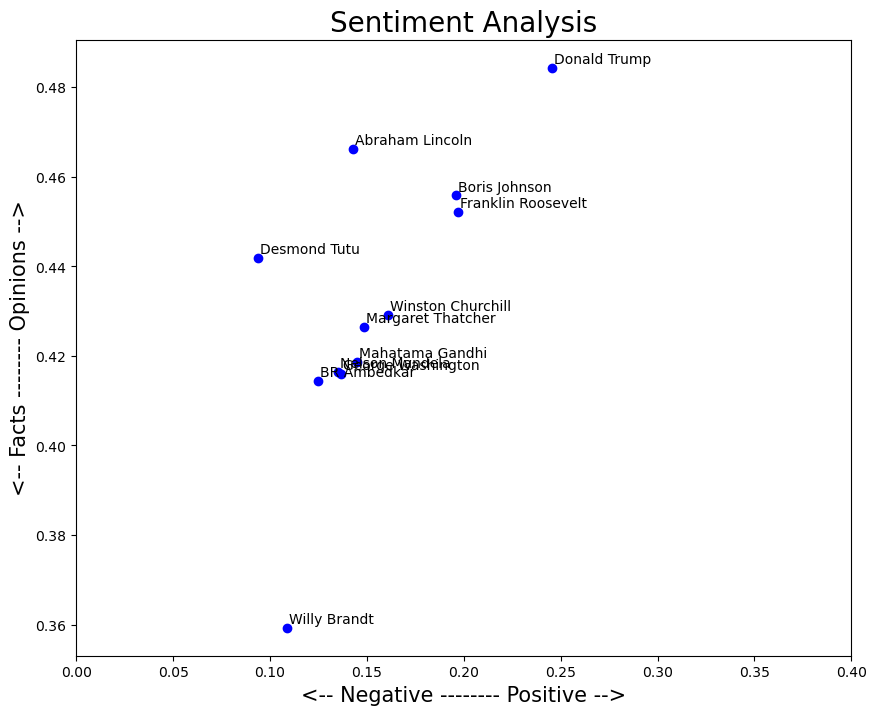

In [3]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10,8]

for index, politician in enumerate(data.index):
    x = data.polarity.loc[politician]
    y = data.subjectivity.loc[politician]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data['full_name'][index], fontsize=10)
    plt.xlim(0.0, .4) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

## Sentiment of Routine Over Time

Instead of looking at the overall sentiment, let's see if there's anything interesting about the sentiment over time throughout each routine.

In [4]:
# Split each routine into 10 parts
import numpy as np
import math

def split_text(text, n=10):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [5]:
# Let's take a look at our data again
data

,transcript,full_name,polarity,subjectivity
abraham,“With malice toward none; with charity for all...,Abraham Lincoln,0.142806,0.466267
ambedkar,Dr B.R. Ambedkar (1891 – 1956) \n\n\n\n\n\n\n\...,BR Ambedkar,0.124722,0.414362
boris,Boris Johnson is a leading Conservative politi...,Boris Johnson,0.196187,0.455850
brandt,Willy Brandt (1913-1992) – German statesman an...,Willy Brandt,0.108714,0.359293
desmond,\n\n\n\n\n\n\n\nDesmond Mpilo Tutu (1931 – 202...,Desmond Tutu,0.093930,0.441900
gandhi,Mahatma Gandhi was a prominent Indian politica...,Mahatama Gandhi,0.144717,0.418625
mandela,\n \n\n\n\nNelson Mandela (1918 – 2013) was a ...,Nelson Mandela,0.135296,0.416433
margaret,\n\n\n\n\n\n\n\nMargaret Thatcher (1925-2013) ...,Margaret Thatcher,0.148645,0.426573
roosevelt,\n\n\n\n\n\n\n\nFranklin Delano Roosevelt (Jan...,Franklin Roosevelt,0.197109,0.452096
trump,Donald Trump (1946 – ) is the 45th President o...,Donald Trump,0.245642,0.484382


In [6]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)
    
list_pieces

[['“With malice toward none; with charity for all; with firmness in the right, as God gives us to see the right, let us strive on to finish the work we are in; to bind up the nation’s wounds…. ” – Abraham Lincoln Abraham Lincoln was born Feb 12, 1809, in a single-room log cabin, Hardin County, Kentucky. His family upbringing was modest; his parents from Virginia were neither wealthy or well known. At an early age, the young Abraham lost his mother, and his father moved away to Indiana. Abraham had to work hard splitting logs and other manual labour. But, he also had a thirst for knowledge and worked very hard to excel in his studies. This led him to become self-trained as a lawyer. He spent eight years working on the Illinois court circuit; his ambition, drive, and capacity for hard work were evident to all around him. Lincoln became respected on the legal circuit and he gained the nickname ‘Honest Abe.’ He often encouraged neighbours to mediate their own conflicts rather than pursue f

In [7]:
# The list has 12 elements, one for each transcript
len(list_pieces)

12

In [8]:
# Each transcript has been split into 12 pieces of text
len(list_pieces[0])

10

In [9]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[0.17132936507936508,
  -0.004166666666666671,
  0.16410256410256407,
  0.15750000000000003,
  0.029418130888719127,
  0.1759259259259259,
  0.10734006734006735,
  0.2020833333333333,
  0.40555555555555556,
  0.08499999999999999],
 [0.0998917748917749,
  0.013333333333333332,
  0.1679020979020979,
  0.06116666666666667,
  0.11355311355311352,
  0.13333333333333333,
  0.08649891774891774,
  0.1527777777777778,
  0.22333333333333333,
  0.28884297520661156],
 [0.13045454545454546,
  0.21428571428571427,
  -0.037500000000000006,
  0.3437698412698413,
  0.19225000000000003,
  0.13523809523809524,
  0.21283931754519989,
  0.20430402930402933,
  0.14923258559622196,
  0.26130952380952377],
 [0.05874999999999999,
  0.06538461538461539,
  0.04523809523809524,
  0.19736842105263158,
  0.046464646464646465,
  0.189390756302521,
  0.12208931419457733,
  0.14010461760461762,
  0.0918546365914787,
  0.1261904761904762],
 [0.020833333333333336,
  0.026666666666666665,
  -0.03981481481481481,
  0.207

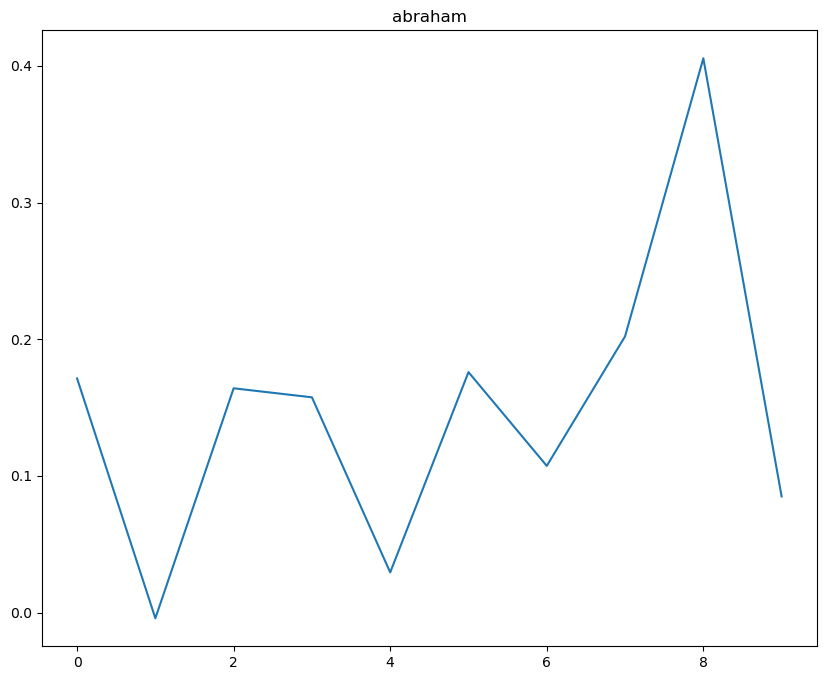

In [10]:
# Show the plot for one politician
plt.plot(polarity_transcript[0])
plt.title(data['full_name'].index[0])
plt.show()

C:\Users\pulki\AppData\Local\Temp\ipykernel_12692\1473044041.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(data['full_name'][index])


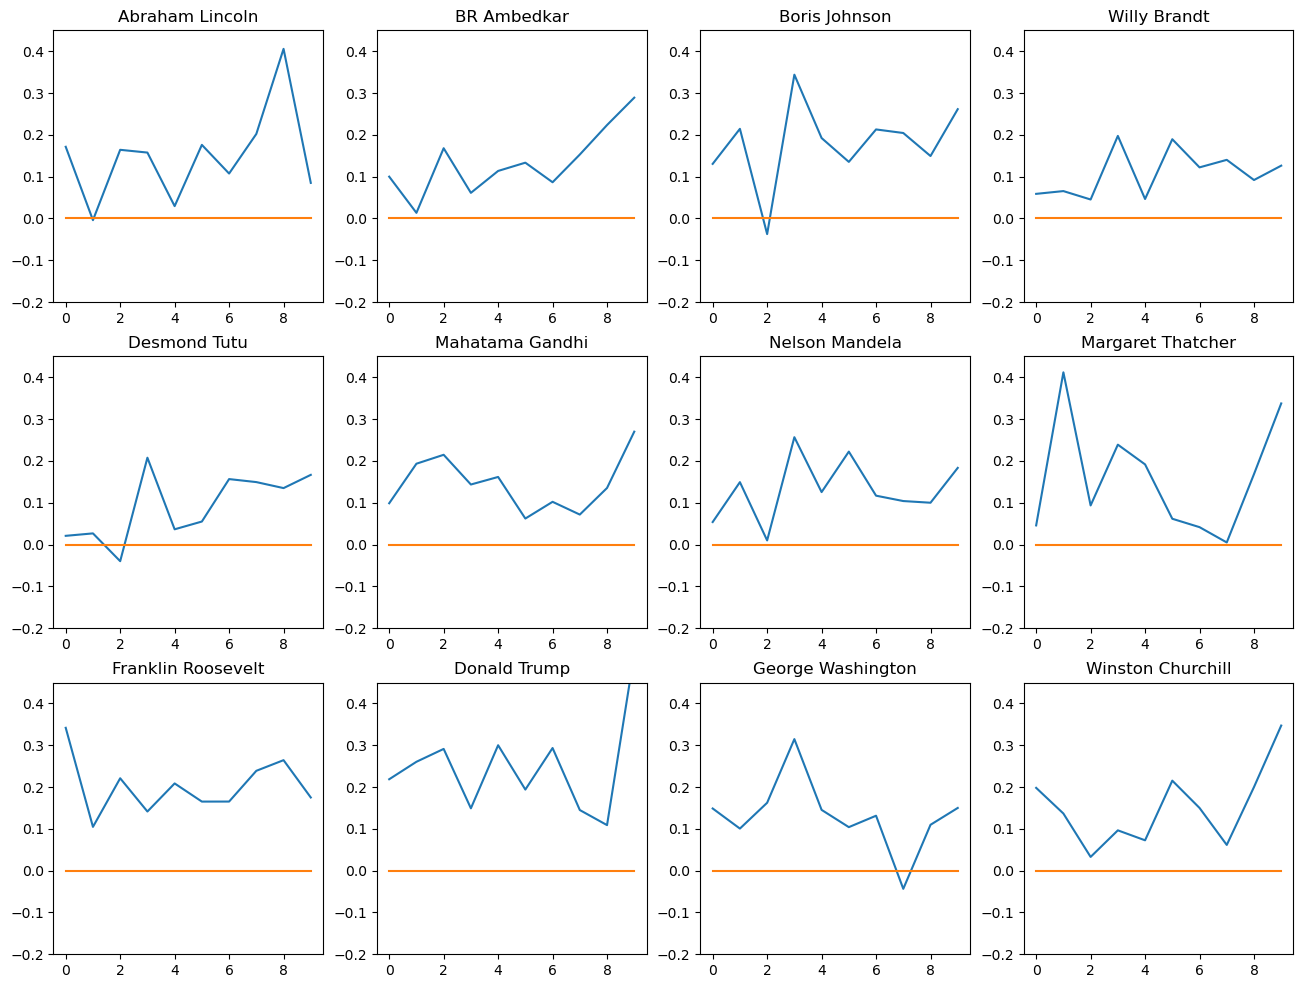

In [11]:
# Show the plot for all politicians
plt.rcParams['figure.figsize'] = [16, 12]

# Define the number of rows and columns for the subplot layout
num_rows = 3
num_columns = 4

# Calculate the total number of subplots
total_subplots = num_rows * num_columns

# Create the subplot layout
for index, politician in enumerate(data.index):    
    plt.subplot(num_rows, num_columns, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0, 10), np.zeros(10))
    plt.title(data['full_name'][index])
    plt.ylim(ymin=-.2, ymax=.45)
    
plt.show()


### Assignments:
1. Classify all politician accordig to Polarity and Subjectivity.



In [12]:
def classify_polarity(polarity):
    if -0.5 <= polarity < 0:
        return 'Negative'
    elif polarity < -0.5:
        return 'Very Negative'
    elif 0<polarity <=0.1:
        return 'Neutral'
    elif 0.1 < polarity <= 0.5:
        return 'Positive'
    else:
        return 'Very Positive'


def classify_subjectivity(subjectivity):
    if 0.20<subjectivity < 0.46:
        return 'Objective'
    elif 0< subjectivity<= 0.20:
        return 'Very Objective'
    elif 0.46<=subjectivity<=0.51:
        return 'Neutral'
    elif 0.51<subjectivity<0.7:
        return 'Subjective'
    else:
        return 'Very Subjective'

# Add polarity and subjectivity classifications to DataFrame
data['polarity_class'] = data['polarity'].apply(classify_polarity)
data['subjectivity_class'] = data['subjectivity'].apply(classify_subjectivity)

In [13]:
data

,transcript,full_name,polarity,subjectivity,polarity_class,subjectivity_class
abraham,“With malice toward none; with charity for all...,Abraham Lincoln,0.142806,0.466267,Positive,Neutral
ambedkar,Dr B.R. Ambedkar (1891 – 1956) \n\n\n\n\n\n\n\...,BR Ambedkar,0.124722,0.414362,Positive,Objective
boris,Boris Johnson is a leading Conservative politi...,Boris Johnson,0.196187,0.455850,Positive,Objective
brandt,Willy Brandt (1913-1992) – German statesman an...,Willy Brandt,0.108714,0.359293,Positive,Objective
desmond,\n\n\n\n\n\n\n\nDesmond Mpilo Tutu (1931 – 202...,Desmond Tutu,0.093930,0.441900,Neutral,Objective
gandhi,Mahatma Gandhi was a prominent Indian politica...,Mahatama Gandhi,0.144717,0.418625,Positive,Objective
mandela,\n \n\n\n\nNelson Mandela (1918 – 2013) was a ...,Nelson Mandela,0.135296,0.416433,Positive,Objective
margaret,\n\n\n\n\n\n\n\nMargaret Thatcher (1925-2013) ...,Margaret Thatcher,0.148645,0.426573,Positive,Objective
roosevelt,\n\n\n\n\n\n\n\nFranklin Delano Roosevelt (Jan...,Franklin Roosevelt,0.197109,0.452096,Positive,Objective
trump,Donald Trump (1946 – ) is the 45th President o...,Donald Trump,0.245642,0.484382,Positive,Neutral


In [14]:
list_pieces = []
for t in data.transcript:
    split = split_text(t,50)
    list_pieces.append(split)
    
list_pieces

[['“With malice toward none; with charity for all; with firmness in the right, as God gives us to see the right, let us strive on to finish the work we are in; to bind up the nation’s wounds…. ” – Abraham Lincoln Abraham Lincoln was born Feb',
  ' 12, 1809, in a single-room log cabin, Hardin County, Kentucky. His family upbringing was modest; his parents from Virginia were neither wealthy or well known. At an early age, the young Abraham lost his mother, and his father moved away ',
  'to Indiana. Abraham had to work hard splitting logs and other manual labour. But, he also had a thirst for knowledge and worked very hard to excel in his studies. This led him to become self-trained as a lawyer. He spent eight years worki',
  'ng on the Illinois court circuit; his ambition, drive, and capacity for hard work were evident to all around him. Lincoln became respected on the legal circuit and he gained the nickname ‘Honest Abe.’ He often encouraged neighbours to med',
  'iate their own confli

In [15]:
polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[0.2857142857142857,
  0.19999999999999998,
  -0.22395833333333334,
  0.18958333333333333,
  0.46249999999999997,
  0.008333333333333331,
  0.03571428571428571,
  -0.12222222222222225,
  0.0,
  0.0,
  0.25,
  0.08333333333333333,
  -0.025,
  0.21666666666666665,
  0.17083333333333334,
  0.2833333333333333,
  0.0,
  0.022222222222222237,
  -0.125,
  0.0,
  -0.0038961038961038896,
  0.2857142857142857,
  -0.09722222222222221,
  0.15,
  0.14444444444444443,
  0.16666666666666666,
  0.12777777777777777,
  0.35000000000000003,
  0.17,
  0.0,
  0.0,
  0.05833333333333335,
  0.5,
  0.13636363636363635,
  0.03212121212121211,
  0.0,
  0.0,
  0.4777777777777778,
  0.175,
  -0.08333333333333333,
  0.5833333333333334,
  0.0,
  0.175,
  0.4866666666666667,
  0.4000000000000001,
  -0.05,
  0.0,
  -0.05,
  0.5,
  -0.25],
 [0.0,
  0.033333333333333326,
  0.1672727272727273,
  0.05,
  0.1123809523809524,
  -0.07777777777777779,
  0.16875,
  0.0,
  0.03125,
  -0.06799999999999999,
  0.1366666666666667

C:\Users\pulki\AppData\Local\Temp\ipykernel_12692\4221340490.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(data['full_name'][index])


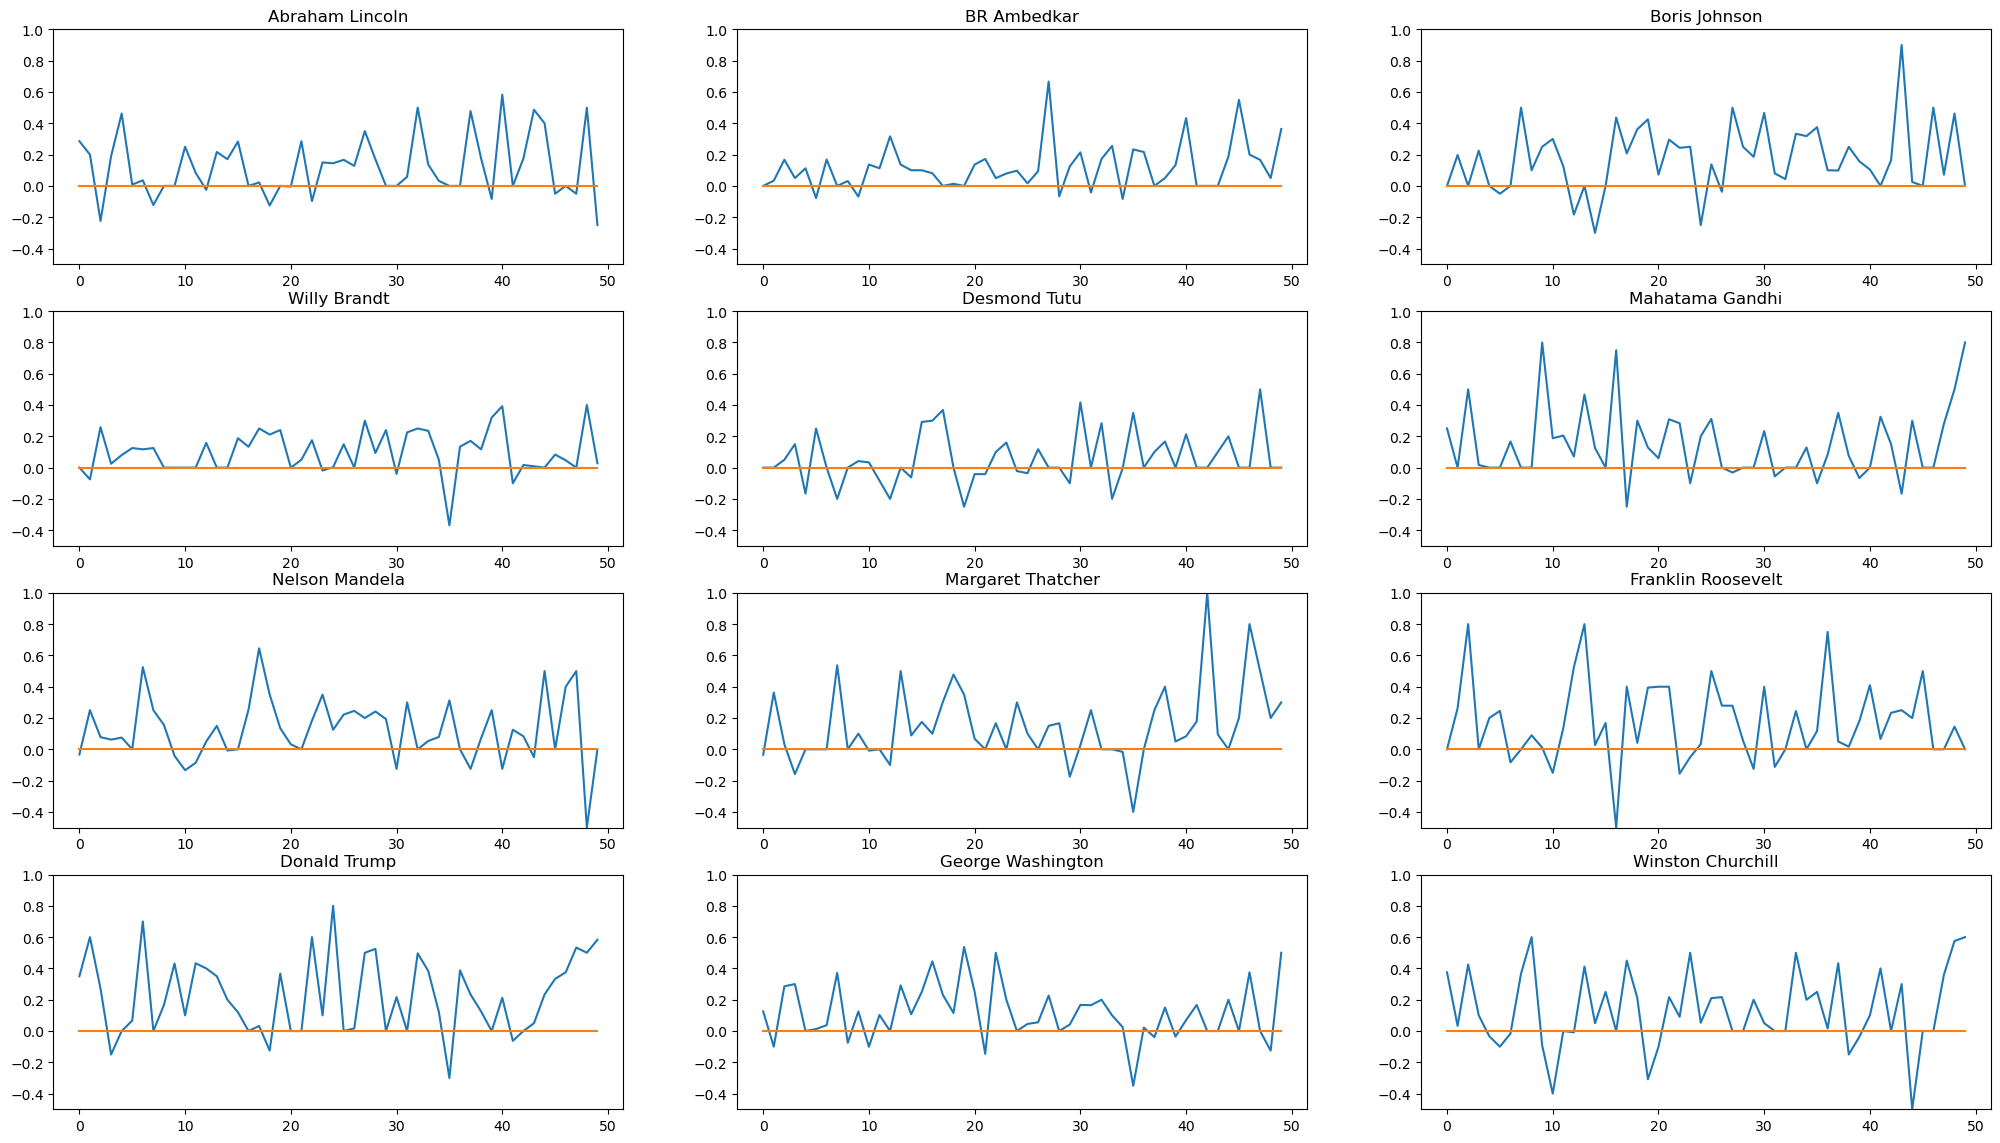

In [16]:
# Show the plot for all politician
plt.rcParams['figure.figsize'] = [25, 25]

for index, politician in enumerate(data.index):    
    plt.subplot(7, 3, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,50), np.zeros(50))
    plt.title(data['full_name'][index])
    plt.ylim(ymin=-.5, ymax=1.0)
    
plt.show()

### Subjectivity of Chunks

In [17]:
sub_transcript = []
for lp in list_pieces:
    sub_piece = []
    for p in lp:
        sub_piece.append(TextBlob(p).sentiment.subjectivity)
    sub_transcript.append(sub_piece)
    
polarity_transcript

[[0.2857142857142857,
  0.19999999999999998,
  -0.22395833333333334,
  0.18958333333333333,
  0.46249999999999997,
  0.008333333333333331,
  0.03571428571428571,
  -0.12222222222222225,
  0.0,
  0.0,
  0.25,
  0.08333333333333333,
  -0.025,
  0.21666666666666665,
  0.17083333333333334,
  0.2833333333333333,
  0.0,
  0.022222222222222237,
  -0.125,
  0.0,
  -0.0038961038961038896,
  0.2857142857142857,
  -0.09722222222222221,
  0.15,
  0.14444444444444443,
  0.16666666666666666,
  0.12777777777777777,
  0.35000000000000003,
  0.17,
  0.0,
  0.0,
  0.05833333333333335,
  0.5,
  0.13636363636363635,
  0.03212121212121211,
  0.0,
  0.0,
  0.4777777777777778,
  0.175,
  -0.08333333333333333,
  0.5833333333333334,
  0.0,
  0.175,
  0.4866666666666667,
  0.4000000000000001,
  -0.05,
  0.0,
  -0.05,
  0.5,
  -0.25],
 [0.0,
  0.033333333333333326,
  0.1672727272727273,
  0.05,
  0.1123809523809524,
  -0.07777777777777779,
  0.16875,
  0.0,
  0.03125,
  -0.06799999999999999,
  0.1366666666666667

C:\Users\pulki\AppData\Local\Temp\ipykernel_12692\1283880536.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(data['full_name'][index])


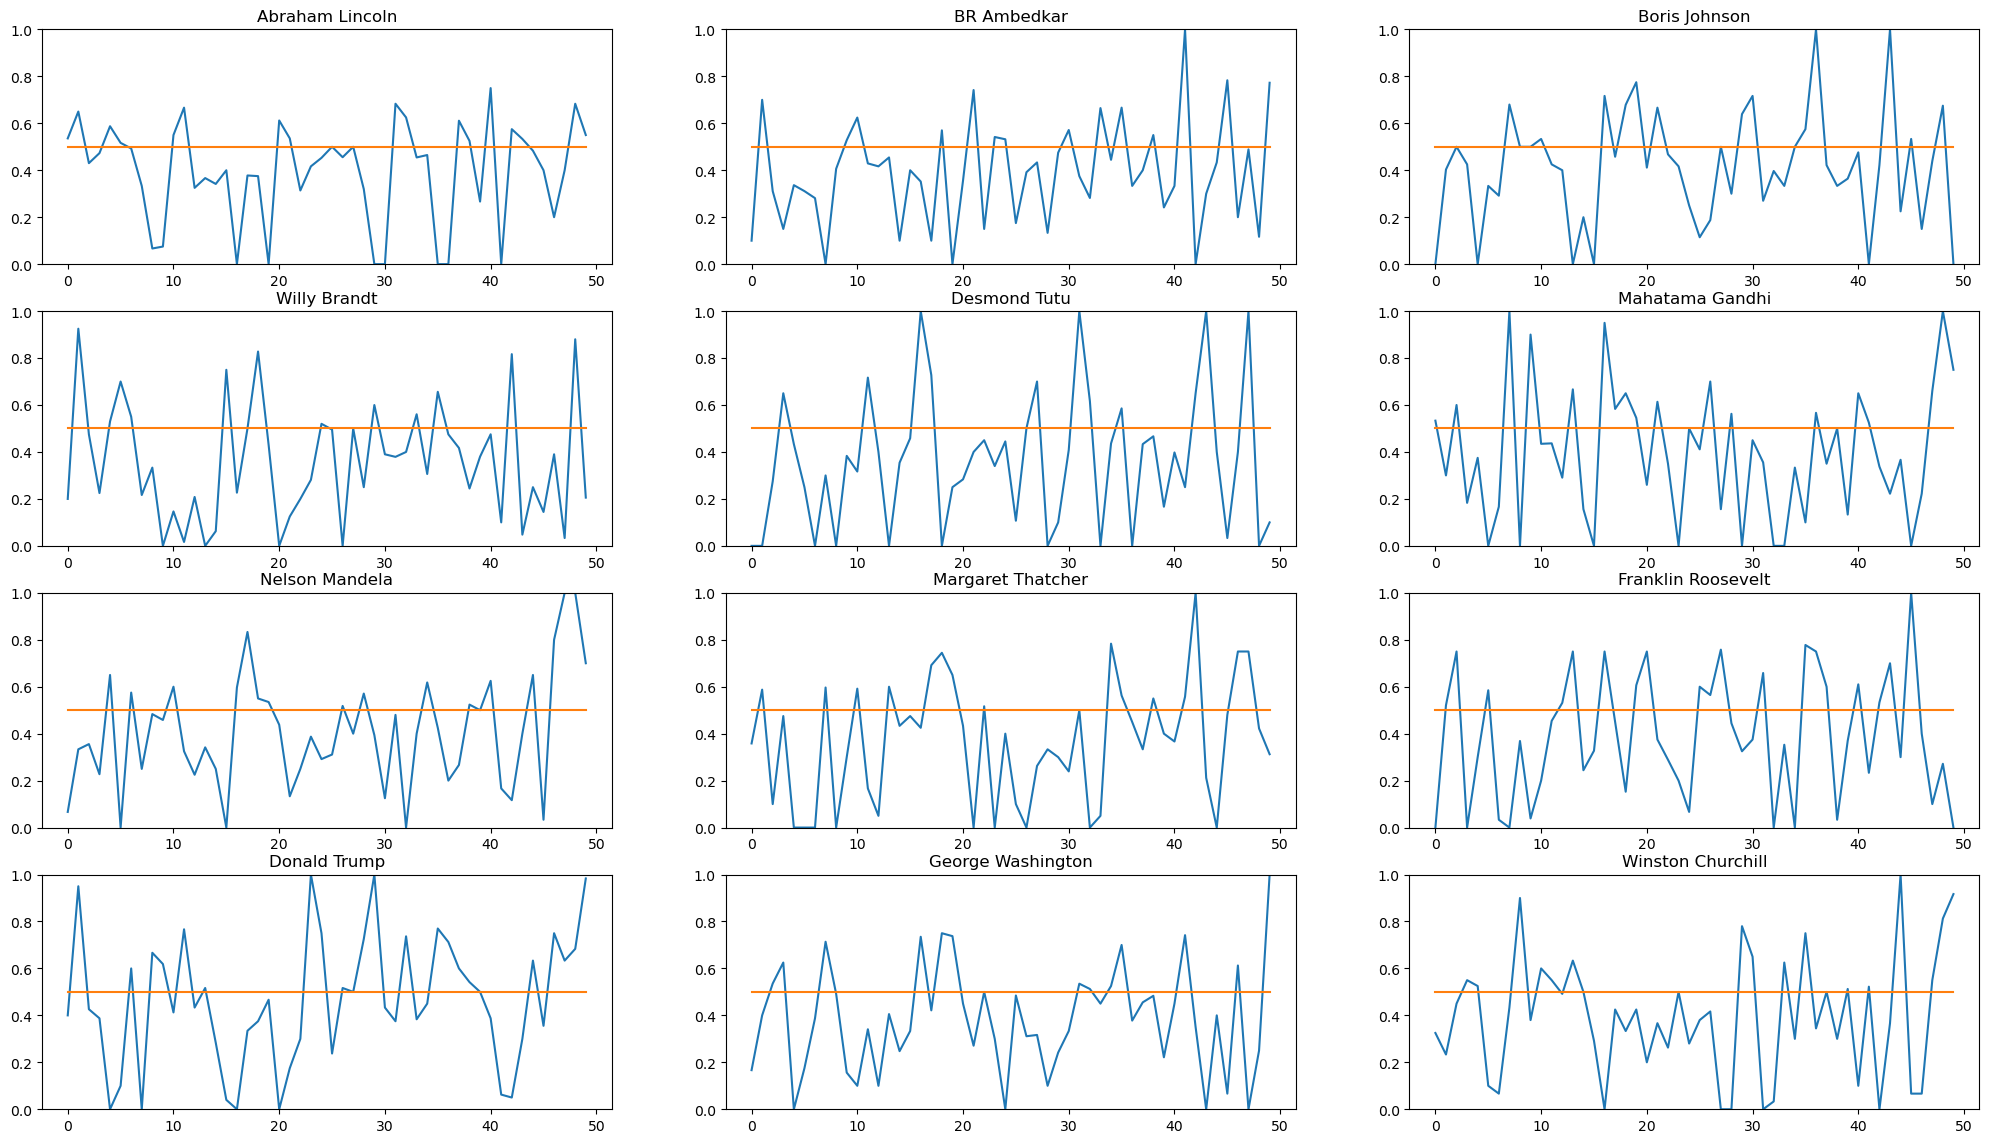

In [18]:
plt.rcParams['figure.figsize'] = [25, 25]

for index, politician in enumerate(data.index):    
    plt.subplot(7, 3, index+1)
    plt.plot(sub_transcript[index])
    plt.plot(np.arange(0, 50), np.full(50, 0.5))  # Horizontal line at y=0.5
    plt.title(data['full_name'][index])
    plt.ylim(ymin=0, ymax=1.0)

plt.show()


In [19]:
def classify_polarity(polarity):
    if -0.5 <= polarity < 0:
        return 'Negative'
    elif polarity < -0.5:
        return 'Very Negative'
    elif 0<polarity <=0.1:
        return 'Neutral'
    elif 0.1 < polarity <= 0.5:
        return 'Positive'
    else:
        return 'Very Positive'


def classify_subjectivity(subjectivity):
    if 0.20<subjectivity < 0.46:
        return 'Objective'
    elif 0< subjectivity<= 0.20:
        return 'Very Objective'
    elif 0.46<=subjectivity<=0.51:
        return 'Neutral'
    elif 0.51<subjectivity<0.7:
        return 'Subjective'
    else:
        return 'Very Subjective'

# Add polarity and subjectivity classifications to DataFrame
data['polarity_class'] = data['polarity'].apply(classify_polarity)
data['subjectivity_class'] = data['subjectivity'].apply(classify_subjectivity)

In [20]:
data

,transcript,full_name,polarity,subjectivity,polarity_class,subjectivity_class
abraham,“With malice toward none; with charity for all...,Abraham Lincoln,0.142806,0.466267,Positive,Neutral
ambedkar,Dr B.R. Ambedkar (1891 – 1956) \n\n\n\n\n\n\n\...,BR Ambedkar,0.124722,0.414362,Positive,Objective
boris,Boris Johnson is a leading Conservative politi...,Boris Johnson,0.196187,0.455850,Positive,Objective
brandt,Willy Brandt (1913-1992) – German statesman an...,Willy Brandt,0.108714,0.359293,Positive,Objective
desmond,\n\n\n\n\n\n\n\nDesmond Mpilo Tutu (1931 – 202...,Desmond Tutu,0.093930,0.441900,Neutral,Objective
gandhi,Mahatma Gandhi was a prominent Indian politica...,Mahatama Gandhi,0.144717,0.418625,Positive,Objective
mandela,\n \n\n\n\nNelson Mandela (1918 – 2013) was a ...,Nelson Mandela,0.135296,0.416433,Positive,Objective
margaret,\n\n\n\n\n\n\n\nMargaret Thatcher (1925-2013) ...,Margaret Thatcher,0.148645,0.426573,Positive,Objective
roosevelt,\n\n\n\n\n\n\n\nFranklin Delano Roosevelt (Jan...,Franklin Roosevelt,0.197109,0.452096,Positive,Objective
trump,Donald Trump (1946 – ) is the 45th President o...,Donald Trump,0.245642,0.484382,Positive,Neutral
